# Achievement First Data Analyst Technical Exercise

In [589]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [590]:
# read in the data
data = pd.read_excel('F&P Sample Data Set.xlsx')

# Pre-Processing

In [591]:
data.head()

,Student ID,School Name,Grade Level,BOY F&P Score,EOY F&P Score
0,10000001,Bushwick Middle School,5,11.0,16.0
1,10000002,Bushwick Middle School,5,11.0,16.0
2,10000003,Crown Heights Middle School,5,11.0,16.0
3,10000004,Bushwick Middle School,5,11.0,16.0
4,10000005,Bushwick Middle School,5,11.0,14.0


In [592]:
# check dimensions of data
print('Data Features: ', data.shape[1])
print('Data Instances: ', data.shape[0])

Data Features:  5
Data Instances:  376


In [593]:
# check datatypes of features
data.dtypes

Student ID         int64
School Name       object
Grade Level       object
BOY F&P Score    float64
EOY F&P Score    float64
dtype: object

In [594]:
# data columns
data.columns

Index(['Student ID', 'School Name', 'Grade Level', 'BOY F&P Score',
       'EOY F&P Score'],
      dtype='object')

In [595]:
# check for null (missing) values
data.isnull().sum()

Student ID        0
School Name       0
Grade Level       0
BOY F&P Score    97
EOY F&P Score    10
dtype: int64

In [596]:
data.loc[data['BOY F&P Score'].isnull(), 'School Name'].value_counts()

Crown Heights Middle School    80
Bushwick Middle School         14
Crown Hghts Middle School       2
Bushwick MS                     1
Name: School Name, dtype: int64

### Grade Level Feature

In [597]:
# check unique 'Grade Level' feature
# --> data may have been manually inputted 
data['Grade Level'].value_counts()

6      197
5      172
5th      5
6th      2
Name: Grade Level, dtype: int64

In [598]:
# Grade Level  == 5
print(type(data['Grade Level'][0]))

# Grade Level == 6th
print(type(data['Grade Level'][374]))

<class 'int'>
<class 'str'>


In [599]:
# convert '5th -> 5' and '6th -> 6' to maintain consistency
data['Grade Level'].replace(to_replace=['5th','6th'], value=[5,6], inplace=True)

In [600]:
# ensure feature 'Grade Level' is correct
data['Grade Level'].value_counts()

6    199
5    177
Name: Grade Level, dtype: int64

### School Name Feature

In [601]:
# check unique 'School Name' feature
# --> data may have been manually inputted
data['School Name'].value_counts()

Bushwick Middle School         198
Crown Heights Middle School    171
Bushwick MS                      4
Crown Hghts Middle School        3
Name: School Name, dtype: int64

In [602]:
# convert 'Brushwick MS -> Bushwick Middle School'
# convert 'Crown Hghts Middle School -> Crown Heights Middle School'

replace_lst = ['Bushwick MS', 'Crown Hghts Middle School']
value_lst = ['Bushwick Middle School', 'Crown Heights Middle School']

data['School Name'].replace(to_replace=replace_lst, value=value_lst, inplace=True)

In [603]:
# ensure feature 'School Name' is correct
data['School Name'].value_counts()

Bushwick Middle School         202
Crown Heights Middle School    174
Name: School Name, dtype: int64

### BOY/EOY F&P Feature

In [604]:
# percent of missing values in 'BOY F&P Score'
# percent of 'BOY F&P Score' data is too large to drop (about 25%)

print('Percentage of missing values (BOY F&P Score): ', 
      (data['BOY F&P Score'].isnull().sum() / data.shape[0])*100)

Percentage of missing values (BOY F&P Score):  25.79787234042553


In [605]:
# percent of missing values in 'BOY F&P Score'
# percent of 'EOY F&P Score' data is too large to drop (about 2%)

print('Percentage of missing values (EOY F&P Score): ', 
      (data['EOY F&P Score'].isnull().sum() / data.shape[0])*100)

Percentage of missing values (EOY F&P Score):  2.6595744680851063


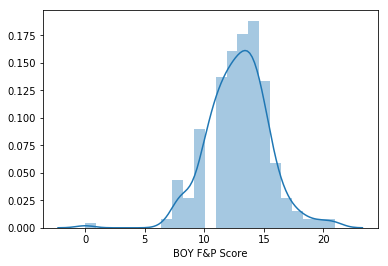

In [606]:
# Distribution plot of 'BOY F&P Score'
# the distribution appears to be fairly normal (no drastic outliers),
# as a result we can use the mean to replace null values 

df = data.loc[data['BOY F&P Score'].notnull(), :]
sns.distplot(df['BOY F&P Score'])

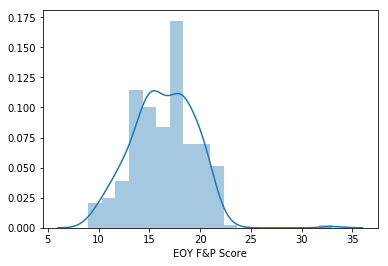

In [607]:
# Distribution plot of 'EOY F&P Score'
# the distribution appears to be fairly normal (no drastic outliers),
# as a result we can use the mean to replace null values 

df = data.loc[data['EOY F&P Score'].notnull(), :]
sns.distplot(df['EOY F&P Score'])

In [608]:
# Obtaining the mean 'BOY F&P Score' per 'Grade Level' feature
data.groupby(['Grade Level', 'School Name'])['BOY F&P Score'].mean()

Grade Level  School Name                
5            Bushwick Middle School         10.868132
             Crown Heights Middle School    13.155844
6            Bushwick Middle School         13.718750
             Crown Heights Middle School    18.066667
Name: BOY F&P Score, dtype: float64

In [609]:
# Obtaining the median 'BOY F&P Score' per 'Grade Level' feature
data.groupby(['Grade Level', 'School Name'])['BOY F&P Score'].median()

Grade Level  School Name                
5            Bushwick Middle School         11.0
             Crown Heights Middle School    13.0
6            Bushwick Middle School         14.0
             Crown Heights Middle School    18.0
Name: BOY F&P Score, dtype: float64

In [610]:
# Obtaining the mean 'EOY F&P Score' per 'Grade Level' feature
data.groupby(['Grade Level', 'School Name'])['EOY F&P Score'].mean()

Grade Level  School Name                
5            Bushwick Middle School         13.580645
             Crown Heights Middle School    14.828947
6            Bushwick Middle School         17.854369
             Crown Heights Middle School    18.829787
Name: EOY F&P Score, dtype: float64

In [611]:
# Obtaining the median 'EOY F&P Score' per 'Grade Level' feature
data.groupby(['Grade Level', 'School Name'])['EOY F&P Score'].median()

Grade Level  School Name                
5            Bushwick Middle School         14.0
             Crown Heights Middle School    15.0
6            Bushwick Middle School         18.0
             Crown Heights Middle School    19.0
Name: EOY F&P Score, dtype: float64

In [612]:
# Since there is not a significant difference in value 
# for the mean and median for both the 'BOY F&P Score' 
# and the 'EOY F&P Score', I will use the median as the 
# replacement test statistic.  Additionally, I chose the 
# median because the values are in the format of 
# XX.0 float type for both columns.

In [613]:
# replace 'BOY F&P Score' and 'EOY F&P Score' null values
# with their respective median value by 'Grade Level' and 'School Name'

In [614]:
gl5_BMS_median_BOY = data.loc[(data['Grade Level']==5)&(data['School Name']=='Bushwick Middle School'),
                          'BOY F&P Score'].median()
# gl5_BMS_median_BOY -- > 11.0

data.loc[(data['Grade Level']==5)&(data['School Name']=='Bushwick Middle School')
         &(data['BOY F&P Score'].isnull()), 'BOY F&P Score'] = gl5_BMS_median_BOY

In [615]:
gl5_BMS_median_EOY = data.loc[(data['Grade Level']==5)&(data['School Name']=='Bushwick Middle School'),
                          'EOY F&P Score'].median()
# gl5_BMS_median_EOY -- > 14.0

data.loc[(data['Grade Level']==5)&(data['School Name']=='Bushwick Middle School')
         &(data['EOY F&P Score'].isnull()), 'EOY F&P Score'] = gl5_BMS_median_EOY

In [616]:
gl5_CHMS_median_BOY = data.loc[(data['Grade Level']==5)&(data['School Name']=='Crown Heights Middle School'),
                          'BOY F&P Score'].median()
# gl5_CHMS_median_BOY -- > 13.0

data.loc[(data['Grade Level']==5)&(data['School Name']=='Crown Heights Middle School')
         &(data['BOY F&P Score'].isnull()), 'BOY F&P Score'] = gl5_CHMS_median_BOY

In [617]:
gl5_CHMS_median_EOY = data.loc[(data['Grade Level']==5)&(data['School Name']=='Crown Heights Middle School'),
                          'EOY F&P Score'].median()
# gl5_CHMS_median_EOY -- > 13.0

data.loc[(data['Grade Level']==5)&(data['School Name']=='Crown Heights Middle School')
         &(data['EOY F&P Score'].isnull()), 'EOY F&P Score'] = gl5_CHMS_median_EOY

In [618]:
gl6_BMS_median_BOY = data.loc[(data['Grade Level']==6)&(data['School Name']=='Bushwick Middle School'),
                          'BOY F&P Score'].median()
# gl6_BMS_median_BOY -- > 14.0

data.loc[(data['Grade Level']==6)&(data['School Name']=='Bushwick Middle School')
         &(data['BOY F&P Score'].isnull()), 'BOY F&P Score'] = gl6_BMS_median_BOY

In [619]:
gl6_BMS_median_EOY = data.loc[(data['Grade Level']==6)&(data['School Name']=='Bushwick Middle School'),
                          'EOY F&P Score'].median()
# gl6_BMS_median_EOY -- > 18.0

data.loc[(data['Grade Level']==6)&(data['School Name']=='Bushwick Middle School')
         &(data['EOY F&P Score'].isnull()), 'EOY F&P Score'] = gl6_BMS_median_EOY

In [620]:
gl6_CHMS_median_BOY = data.loc[(data['Grade Level']==6)&(data['School Name']=='Crown Heights Middle School'),
                          'BOY F&P Score'].median()
# gl6_CHMS_median_BOY -- > 14.0

data.loc[(data['Grade Level']==6)&(data['School Name']=='Crown Heights Middle School')
         &(data['BOY F&P Score'].isnull()), 'BOY F&P Score'] = gl6_CHMS_median_BOY

In [621]:
gl6_CHMS_median_EOY = data.loc[(data['Grade Level']==6)&(data['School Name']=='Crown Heights Middle School'),
                          'EOY F&P Score'].median()
# gl6_CHMS_median_EOY -- > 19.0

data.loc[(data['Grade Level']==6)&(data['School Name']=='Crown Heights Middle School')
         &(data['EOY F&P Score'].isnull()), 'EOY F&P Score'] = gl6_CHMS_median_EOY

In [622]:
data.isnull().sum()

Student ID       0
School Name      0
Grade Level      0
BOY F&P Score    0
EOY F&P Score    0
dtype: int64

# Feature Engineering 

In [623]:
# include the additional feature of 'Proficiency Level'
# 4th Grade EOY / 5th Grade BOY: Remedial (1-9), Below Proficient (10-11), Proficient (12-13), Advanced (14+)
# 5th Grade EOY / 6th Grade BOY: Remedial (1-11), Below Proficient (12-13), Proficient (14-15), Advanced (16+)
# 6th Grade EOY / 7th Grade BOY: Remedial (1-13), Belwo Proficient (14-15), Proficient (16-17), Advanced (18+)

# Relevant for our dataset:
# - 5th Grade BOY: Remedial (1-9), Below Proficient (10-11), Proficient (12-13), Advanced (14+)
# - 5th Grade EOY: Remedial (1-11), Below Proficient (12-13), Proficient (14-15), Advanced (16+)
# - 6th Grade BOY: Remedial (1-11), Below Proficient (12-13), Proficient (14-15), Advanced (16+)
# - 6th Grade EOY: Remedial (1-13), Below Proficient (14-15), Proficient (16-17), Advanced (18+)

In [624]:
# Defined two functions:
# - one for BOY for both 5/6 grade level
# - one for EOY for both 5/6 grade level

def BOY_Prof(row):
    if row['Grade Level'] == 5:
        if (row['BOY F&P Score']>0) & (row['BOY F&P Score']<=9):
            return 'Remedial'
        elif (row['BOY F&P Score']>9) & (row['BOY F&P Score']<=11):
            return 'Below Proficient'
        elif (row['BOY F&P Score']>11) & (row['BOY F&P Score']<=13):
            return 'Proficient'
        else:
            return 'Advanced'
    elif row['Grade Level'] == 6:
        if (row['BOY F&P Score']>0) & (row['BOY F&P Score']<=11):
            return 'Remedial'
        elif (row['BOY F&P Score']>11) & (row['BOY F&P Score']<=13):
            return 'Below Proficient'
        elif (row['BOY F&P Score']>13) & (row['BOY F&P Score']<=15):
            return 'Proficient'
        else:
            return 'Advanced'
    else:
        return np.NaN
    
def EOY_Prof(row):
    if row['Grade Level'] == 5:
        if (row['EOY F&P Score']>0) & (row['EOY F&P Score']<=11):
            return 'Remedial'
        elif (row['EOY F&P Score']>11) & (row['EOY F&P Score']<=13):
            return 'Below Proficient'
        elif (row['EOY F&P Score']>13) & (row['EOY F&P Score']<=15):
            return 'Proficient'
        else:
            return 'Advanced'
    elif row['Grade Level'] == 6:
        if (row['EOY F&P Score']>0) & (row['EOY F&P Score']<=13):
            return 'Remedial'
        elif (row['EOY F&P Score']>13) & (row['EOY F&P Score']<=15):
            return 'Below Proficient'
        elif (row['EOY F&P Score']>15) & (row['EOY F&P Score']<=17):
            return 'Proficient'
        else:
            return 'Advanced'
    else:
        return np.NaN

In [625]:
data['BOY Proficiency'] = data.apply(func=BOY_Prof, axis=1)
data['EOY Proficiency'] = data.apply(func=EOY_Prof, axis=1)

In [626]:
data.head()

,Student ID,School Name,Grade Level,BOY F&P Score,EOY F&P Score,BOY Proficiency,EOY Proficiency
0,10000001,Bushwick Middle School,5,11.0,16.0,Below Proficient,Advanced
1,10000002,Bushwick Middle School,5,11.0,16.0,Below Proficient,Advanced
2,10000003,Crown Heights Middle School,5,11.0,16.0,Below Proficient,Advanced
3,10000004,Bushwick Middle School,5,11.0,16.0,Below Proficient,Advanced
4,10000005,Bushwick Middle School,5,11.0,14.0,Below Proficient,Proficient


In [627]:
data.isnull().sum()

Student ID         0
School Name        0
Grade Level        0
BOY F&P Score      0
EOY F&P Score      0
BOY Proficiency    0
EOY Proficiency    0
dtype: int64

# Exploratory Data Analysis

Note: the analysis below included the replacement of null values with the median test statistic for both the 'BOY F&P Score' and 'EOY F&P Score'.  The null scores accounted for about 25% of all scores, which was too significant to drop.  This could be the reason why for ex) Crown Heights Proficiency levels decrease from BOY to EOY.  My assumption is that kids may have joined mid school year and did not receive an initial BOY F&P Score.

### BOY/EOY Analysis

In [628]:
# barplot displaying the 'BOY F&P Scores' with respect to 'School Name' and 'Grade Level'

# It appears that Bushwick Middle School has a lowered BOY F&P Score for both
# Grades 5th and 6th when compared to Crown Heights Middle School. 

# Bushwick Middle School

#               BOY F&P Scores:   EOY F&P Scores:   Increase:
# 5th Graders:  10.876289         13.597938         2.721649
# 6th Graders:  13.742857         17.857143         4.114286

# Crown Heights Middle School

#               BOY F&P Scores:   EOY F&P Scores:   Increase:
# 5th Graders:  13.150000         14.837500         1.6875
# 6th Graders:  18.010638         18.829787         0.826862

# Interestingly enough, the 5th graders at Crown Heights Middle School 
# are practically at the same reading level as the 6th graders at Bushwick Middle School in the BOY. 
# The 6th graders at Bushwick Middle School have a slightly raised BOY F&P Score than the 5th graders 
# at Crown Heights Middle School. This is to be expected since the grade level is higher, but 
# the BOY Scores are so close in value with only a difference of 0.592857.

# What is interesting about this data is that although the Crown Heights Middle Schoolers are starting 
# off at a higher F&P Score in the BOY, they did not progress as significantly as the Bushwick Middle 
# Schoolers.  On the other hand, since Bushwick Middle Schoolers did begin the year at a lower F&P Score 
# there was a lot of room for improvement. 

# NOTE: replacement of null values may have affected these results. 


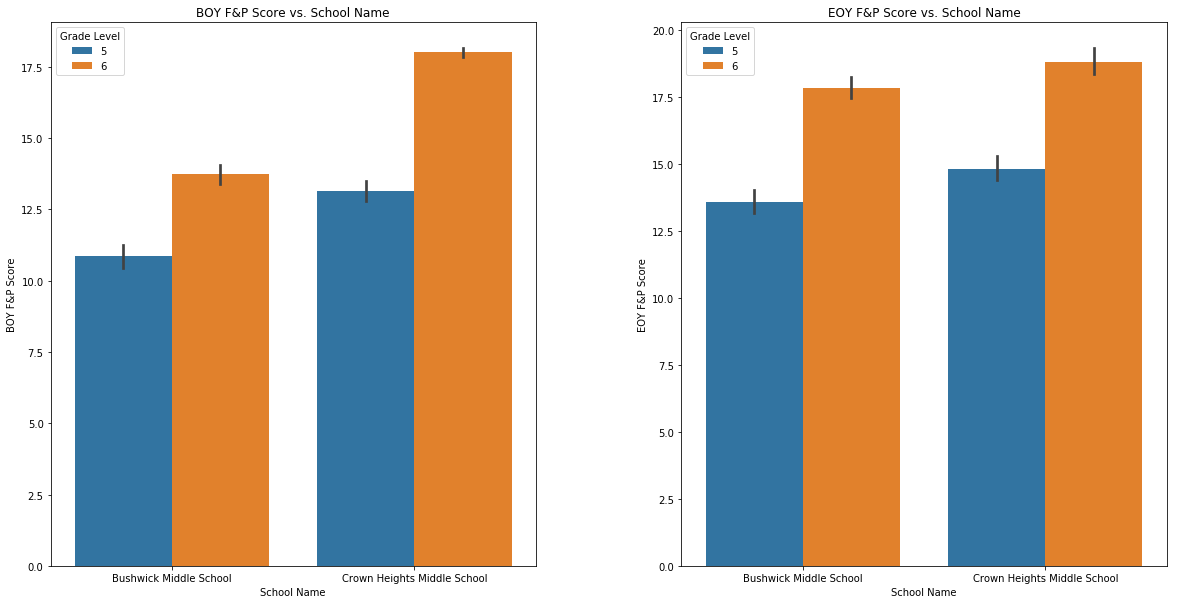

In [629]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('BOY F&P Score vs. School Name')
sns.barplot(x='School Name', y='BOY F&P Score', hue='Grade Level', data=data)

plt.subplot(1,2,2)
plt.title('EOY F&P Score vs. School Name')
sns.barplot(x='School Name', y='EOY F&P Score', hue='Grade Level', data=data)

plt.subplots_adjust(wspace = 0.3, hspace = 0.3);

In [630]:
data.groupby(['School Name', 'Grade Level'])['BOY F&P Score'].mean()

School Name                  Grade Level
Bushwick Middle School       5              10.876289
                             6              13.742857
Crown Heights Middle School  5              13.150000
                             6              18.010638
Name: BOY F&P Score, dtype: float64

In [631]:
data.groupby(['School Name', 'Grade Level'])['EOY F&P Score'].mean()

School Name                  Grade Level
Bushwick Middle School       5              13.597938
                             6              17.857143
Crown Heights Middle School  5              14.837500
                             6              18.829787
Name: EOY F&P Score, dtype: float64

### Bushwick Proficiency Analysis

In [632]:
# countplot of Bushwick MS 'BOY Proficiency' with repsect to 'Grade Level'

# Bushwick Middle School

# BOY Proficieny  -   Remedial:     Below Proficient:   Proficient:    Advanced:
# 5th Graders:        16/97 - 16%   47/97 - 48%         23/97 - 23%    11/97 - 11%
# 6th Graders:        9/105 - 8%    32/105 - 30%        49/105 - 46%   15/105 - 14%

# EOY Proficiency -  Remedial:      Below Proficient:   Proficient:    Advanced:
# 5th Graders:       18/97 - 18%    24/97 - 24%         39/97 - 40%    16/97 - 16%
# 6th Graders:       2/105 - 2%     12/105 - 11%        26/105 - 24%   65/105 - 61%

# Difference -      Remedial:     Below Proficient:   Proficient:    Advanced:
# 5th Graders:       +2%           -24%                +17%           +5%
# 6th Graders:       -6%           -19%                - 22%          +47%

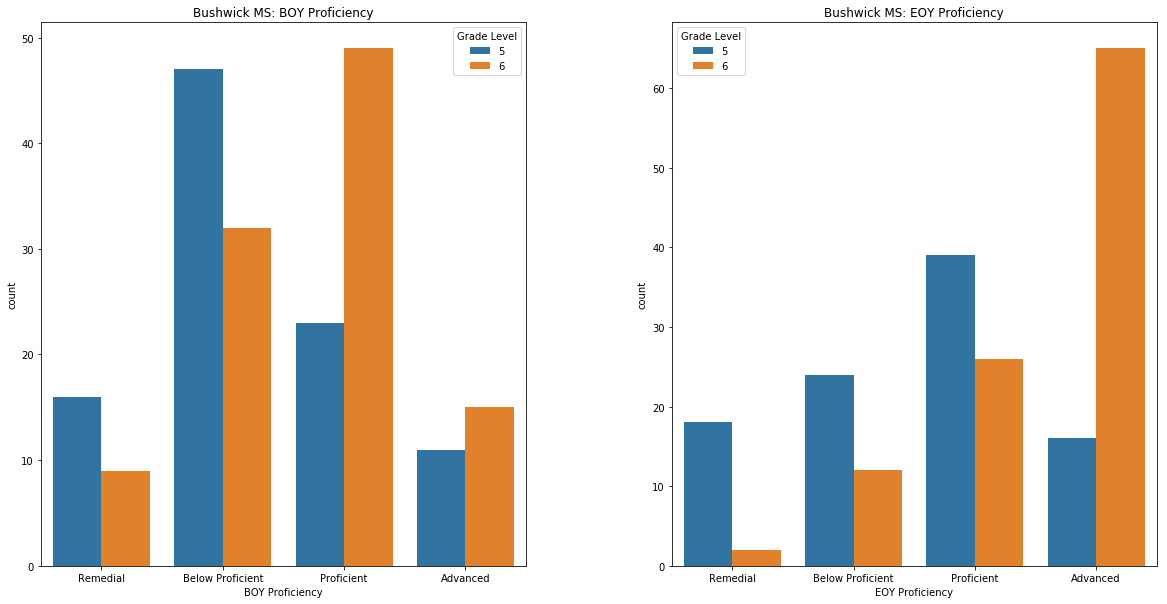

In [633]:
bushwick = data.loc[data['School Name']=='Bushwick Middle School',:]

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Bushwick MS: BOY Proficiency')
sns.countplot(x='BOY Proficiency', hue='Grade Level',
            order=['Remedial','Below Proficient', 'Proficient', 'Advanced'],
            data=bushwick)

plt.subplot(1,2,2)
plt.title('Bushwick MS: EOY Proficiency')
sns.countplot(x='EOY Proficiency', hue='Grade Level',
            order=['Remedial','Below Proficient', 'Proficient', 'Advanced'],
            data=bushwick);

plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

In [634]:
bush.groupby('Grade Level')['BOY Proficiency'].value_counts()

Grade Level  BOY Proficiency 
5            Below Proficient    47
             Proficient          23
             Remedial            16
             Advanced            11
6            Proficient          49
             Below Proficient    32
             Advanced            15
             Remedial             9
Name: BOY Proficiency, dtype: int64

In [635]:
bush.groupby('Grade Level')['EOY Proficiency'].value_counts()

Grade Level  EOY Proficiency 
5            Proficient          39
             Below Proficient    24
             Remedial            18
             Advanced            16
6            Advanced            65
             Proficient          26
             Below Proficient    12
             Remedial             2
Name: EOY Proficiency, dtype: int64

### Crown Heights Proficiency Analysis

In [636]:
# countplot of Crown Heights MS 'BOY Proficiency' with repsect to 'Grade Level'

# Crown Heights Middle School

# BOY Proficieny  -   Remedial:     Below Proficient:   Proficient:    Advanced:
# 5th Graders:        3/80 - 3%     9/80 - 11%          34/80 - 43%    34/80 - 43%
# 6th Graders:        0/94 - 0%     0/94 - 0%           2/94 - 2%      92/94 - 97%

# EOY Proficiency -  Remedial:      Below Proficient:   Proficient:    Advanced:
# 5th Graders:       4/80 - 5%      15/80 - 19%         35/80 - 44%    26/80 - 32%
# 6th Graders:       1/94 - 1%      4/94 - 4%           17/94 - 18%    72/94 - 76%

# Difference -      Remedial:     Below Proficient:   Proficient:    Advanced:
# 5th Graders:       -2%           +8%                 +1%            -11%
# 6th Graders:       +1%           +4%                 +12%           -21%

# NOTE: replacement of null values may have affected these results.


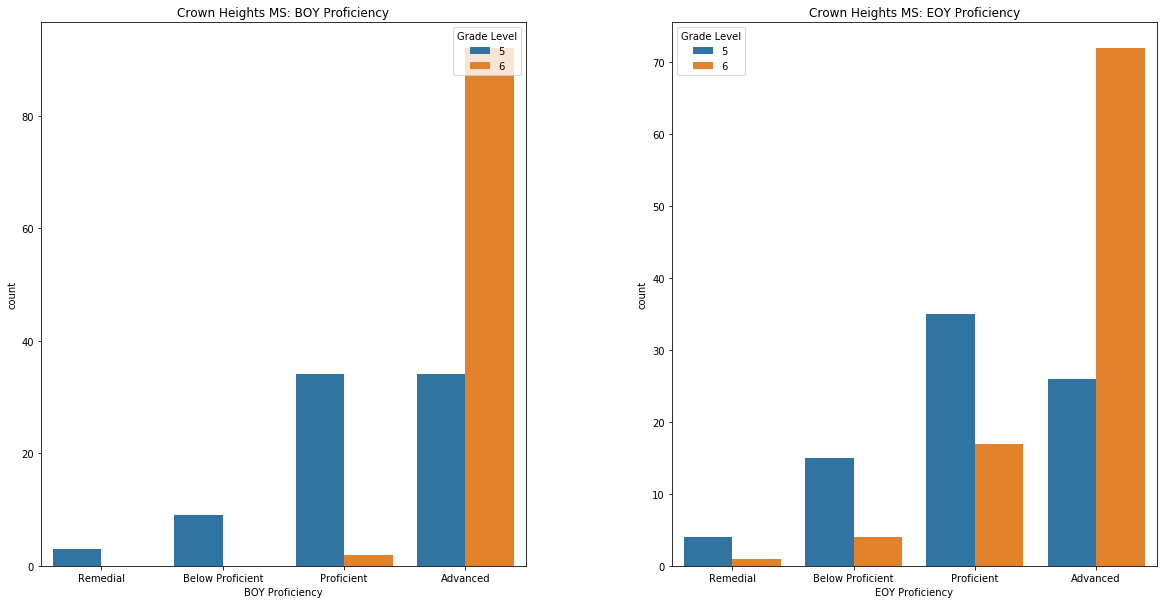

In [637]:
crown = data.loc[data['School Name']=='Crown Heights Middle School',:]

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Crown Heights MS: BOY Proficiency')
sns.countplot(x='BOY Proficiency', hue='Grade Level',
            order=['Remedial','Below Proficient', 'Proficient', 'Advanced'],
            data=crown)

plt.subplot(1,2,2)
plt.title('Crown Heights MS: EOY Proficiency')
sns.countplot(x='EOY Proficiency', hue='Grade Level',
            order=['Remedial','Below Proficient', 'Proficient', 'Advanced'],
            data=crown)

plt.subplots_adjust(wspace = 0.3, hspace = 0.3);

In [638]:
crown.groupby('Grade Level')['BOY Proficiency'].value_counts()

Grade Level  BOY Proficiency 
5            Advanced            34
             Proficient          34
             Below Proficient     9
             Remedial             3
6            Advanced            92
             Proficient           2
Name: BOY Proficiency, dtype: int64

In [639]:
crown.groupby('Grade Level')['EOY Proficiency'].value_counts()

Grade Level  EOY Proficiency 
5            Proficient          35
             Advanced            26
             Below Proficient    15
             Remedial             4
6            Advanced            72
             Proficient          17
             Below Proficient     4
             Remedial             1
Name: EOY Proficiency, dtype: int64

In [640]:
data.head()

,Student ID,School Name,Grade Level,BOY F&P Score,EOY F&P Score,BOY Proficiency,EOY Proficiency
0,10000001,Bushwick Middle School,5,11.0,16.0,Below Proficient,Advanced
1,10000002,Bushwick Middle School,5,11.0,16.0,Below Proficient,Advanced
2,10000003,Crown Heights Middle School,5,11.0,16.0,Below Proficient,Advanced
3,10000004,Bushwick Middle School,5,11.0,16.0,Below Proficient,Advanced
4,10000005,Bushwick Middle School,5,11.0,14.0,Below Proficient,Proficient
